In [382]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

In [383]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Average Rooms Number

In [385]:
df['AveRooms'].describe()

count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64

In [386]:
def draw_hist(df, col):
    sns.histplot(df[col], bins=30, kde=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

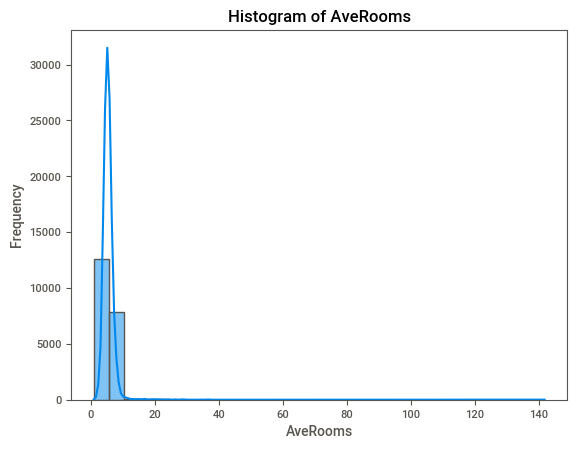

In [387]:
draw_hist(df, 'AveRooms')

In [388]:
df = df[df['AveRooms'] <= 20]
df['AveRooms'].describe()

count    20571.000000
mean         5.334810
std          1.421825
min          0.846154
25%          4.438065
50%          5.224764
75%          6.041816
max         19.962121
Name: AveRooms, dtype: float64

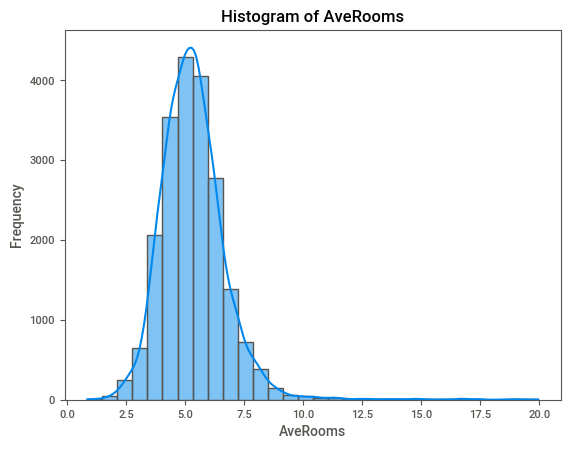

In [389]:
draw_hist(df, 'AveRooms')

In [390]:
df = df[df['AveRooms'] <= 10]
df['AveRooms'].describe()

count    20414.000000
mean         5.275112
std          1.227792
min          0.846154
25%          4.432186
50%          5.213242
75%          6.016048
max         10.000000
Name: AveRooms, dtype: float64

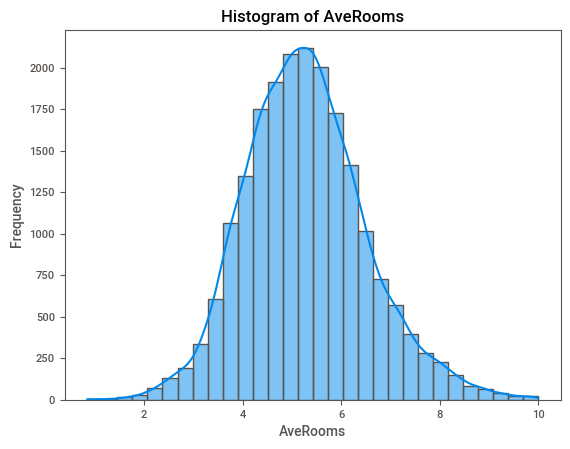

In [391]:
draw_hist(df, 'AveRooms')

## Average Bedrooms

In [392]:
df['AveBedrms'].describe()

count    20414.000000
mean         1.066171
std          0.128552
min          0.333333
25%          1.005525
50%          1.047851
75%          1.097294
max          3.411111
Name: AveBedrms, dtype: float64

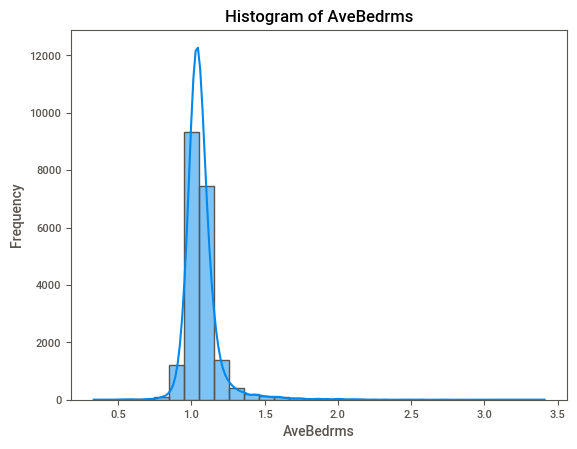

In [393]:
draw_hist(df, 'AveBedrms')

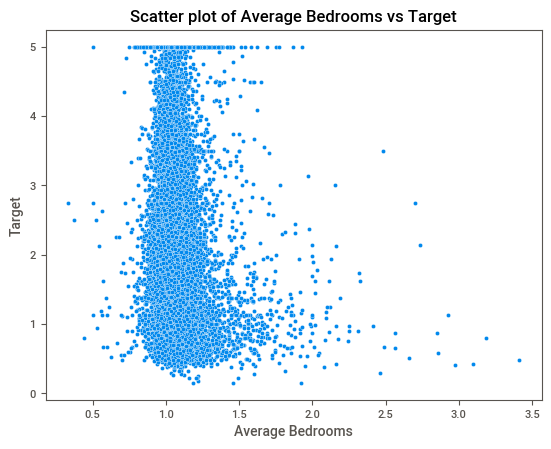

In [394]:
sns.scatterplot(x='AveBedrms', y='target', data=df)
plt.xlabel('Average Bedrooms')
plt.ylabel('Target')
plt.title('Scatter plot of Average Bedrooms vs Target')
plt.show()

## House Age

In [395]:
df['HouseAge'].describe()

count    20414.000000
mean        28.755021
std         12.564702
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: HouseAge, dtype: float64

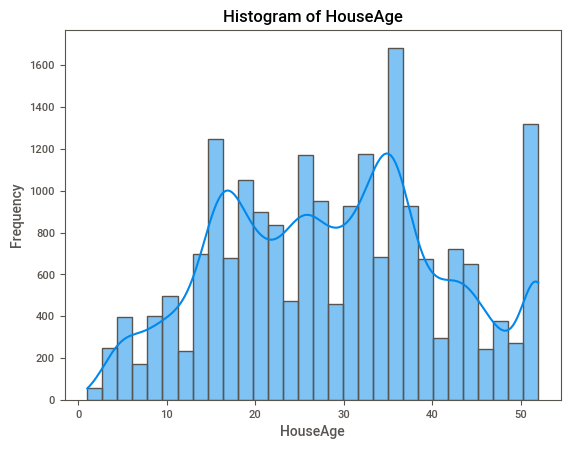

In [396]:
draw_hist(df, 'HouseAge')

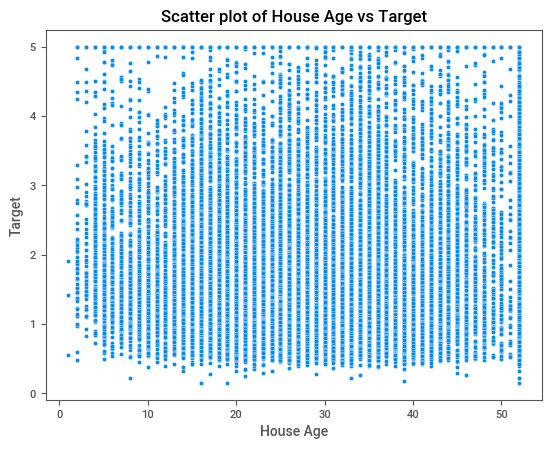

In [397]:
sns.scatterplot(x='HouseAge', y='target', data=df)
plt.xlabel('House Age')
plt.ylabel('Target')
plt.title('Scatter plot of House Age vs Target')
plt.show()

## MedInc 

In [398]:
df['MedInc'].describe()

count    20414.000000
mean         3.867298
std          1.891839
min          0.499900
25%          2.562500
50%          3.534100
75%          4.742600
max         15.000100
Name: MedInc, dtype: float64

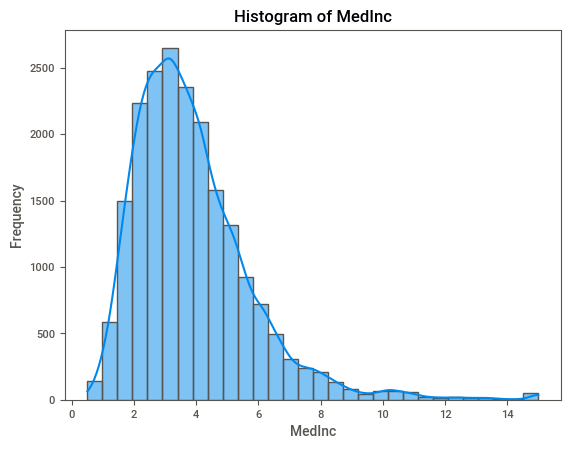

In [399]:
draw_hist(df, 'MedInc')

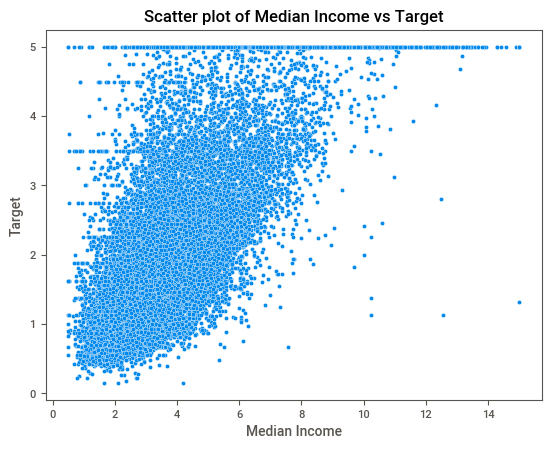

In [400]:
sns.scatterplot(x='MedInc', y='target', data=df)
plt.xlabel('Median Income')
plt.ylabel('Target')
plt.title('Scatter plot of Median Income vs Target')
plt.show()

## Population

In [401]:
df['Population'].describe() 

count    20414.000000
mean      1434.718575
std       1133.453777
min          3.000000
25%        795.000000
50%       1173.000000
75%       1731.000000
max      35682.000000
Name: Population, dtype: float64

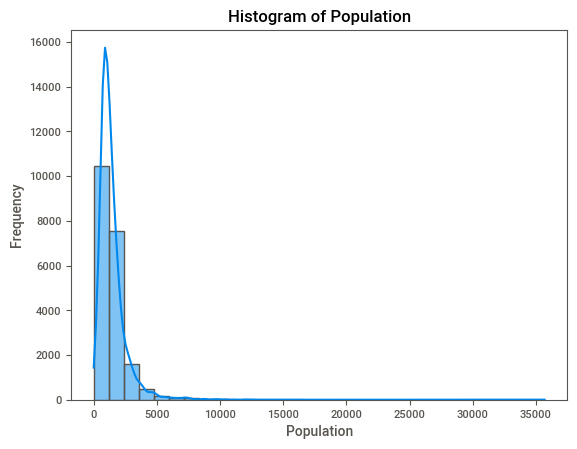

In [402]:
draw_hist(df, 'Population')

In [403]:
df[df['Population'] > 10000].count()

MedInc        23
HouseAge      23
AveRooms      23
AveBedrms     23
Population    23
AveOccup      23
Latitude      23
Longitude     23
target        23
dtype: int64

In [404]:
df = df[df['Population'] < 10000]
df['Population'].describe()

count    20391.000000
mean      1420.529106
std       1033.126887
min          3.000000
25%        795.000000
50%       1172.000000
75%       1728.000000
max       9936.000000
Name: Population, dtype: float64

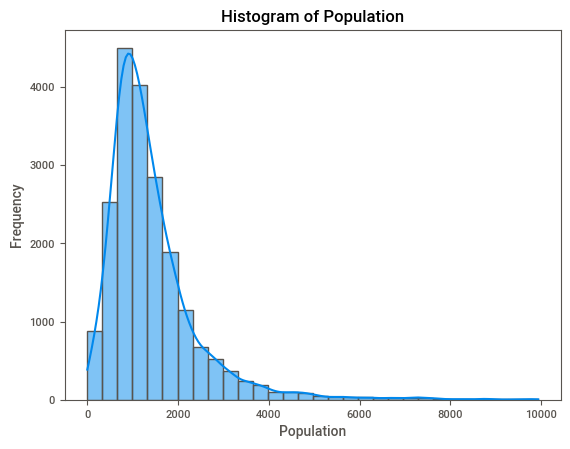

In [405]:
draw_hist(df, 'Population')

In [406]:
df[df['Population'] > 5000].count()

MedInc        282
HouseAge      282
AveRooms      282
AveBedrms     282
Population    282
AveOccup      282
Latitude      282
Longitude     282
target        282
dtype: int64

In [407]:
df = df[df['Population'] < 5000]
df['Population'].describe()

count    20109.000000
mean      1348.196131
std        825.969126
min          3.000000
25%        790.000000
50%       1161.000000
75%       1696.000000
max       4992.000000
Name: Population, dtype: float64

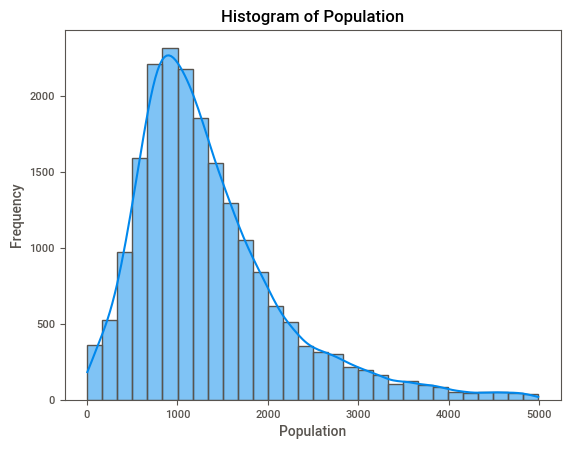

In [408]:
draw_hist(df, 'Population')

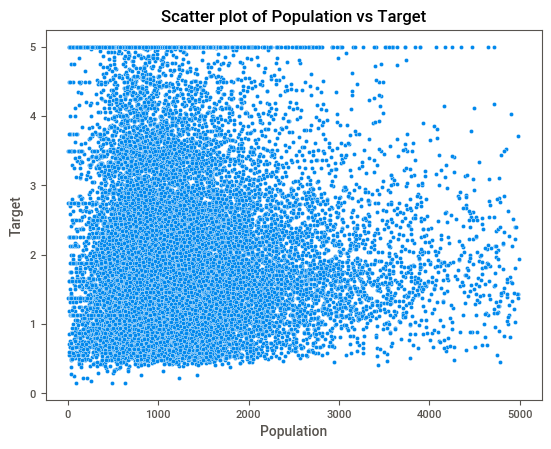

In [409]:
sns.scatterplot(x='Population', y='target', data=df)    
plt.xlabel('Population')
plt.ylabel('Target')
plt.title('Scatter plot of Population vs Target')
plt.show()

## AveOccup

In [410]:
df['AveOccup'].describe()

count    20109.000000
mean         2.969806
std          4.344632
min          0.750000
25%          2.430213
50%          2.818482
75%          3.282258
max        599.714286
Name: AveOccup, dtype: float64

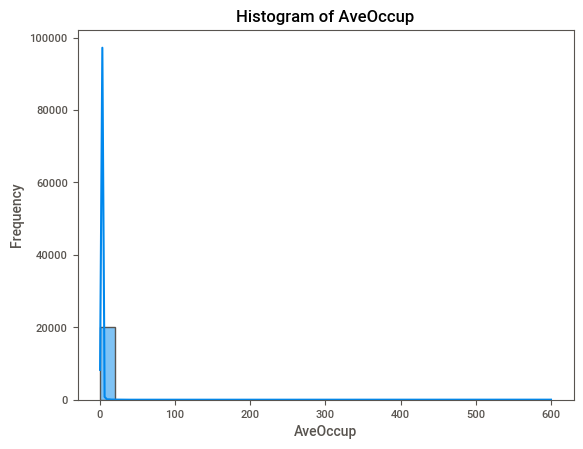

In [411]:
draw_hist(df, 'AveOccup')

In [412]:
df[df['AveOccup'] > 10].count()

MedInc        29
HouseAge      29
AveRooms      29
AveBedrms     29
Population    29
AveOccup      29
Latitude      29
Longitude     29
target        29
dtype: int64

In [413]:
df = df[df['AveOccup'] < 10]
df['AveOccup'].describe()

count    20080.000000
mean         2.917682
std          0.761914
min          0.750000
25%          2.429279
50%          2.817596
75%          3.279435
max          9.954545
Name: AveOccup, dtype: float64

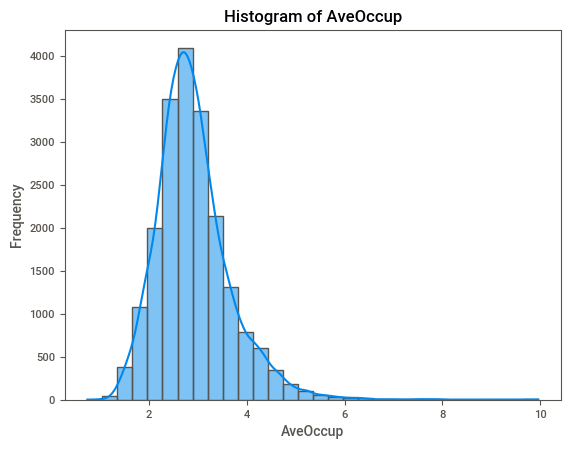

In [414]:
draw_hist(df, 'AveOccup')

In [415]:
df[df['AveOccup'] > 6].count()

MedInc        69
HouseAge      69
AveRooms      69
AveBedrms     69
Population    69
AveOccup      69
Latitude      69
Longitude     69
target        69
dtype: int64

In [416]:
df = df[df['AveOccup'] < 6]
df['AveOccup'].describe()

count    20010.000000
mean         2.902899
std          0.717805
min          0.750000
25%          2.428453
50%          2.815526
75%          3.273439
max          5.995680
Name: AveOccup, dtype: float64

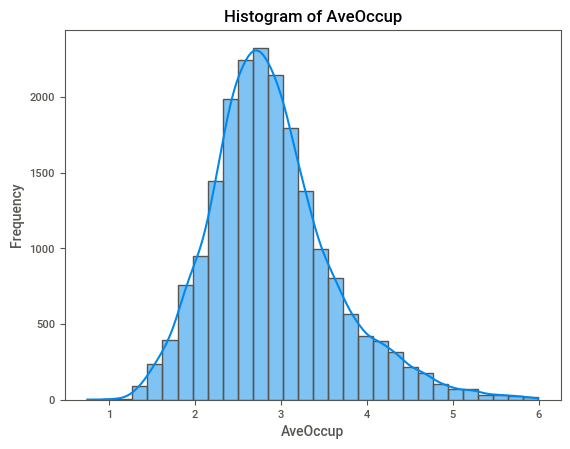

In [417]:
draw_hist(df, 'AveOccup')

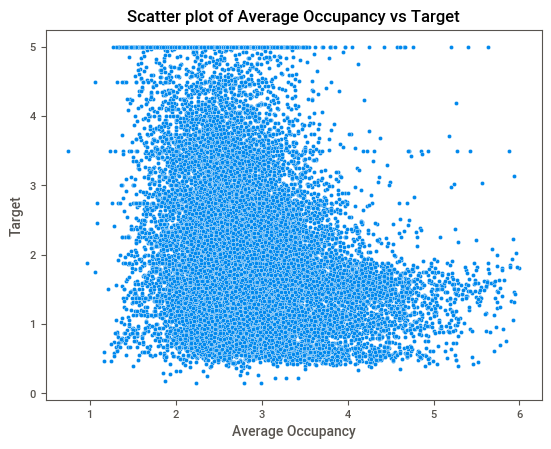

In [418]:
sns.scatterplot(x='AveOccup', y='target', data=df)
plt.xlabel('Average Occupancy')
plt.ylabel('Target')
plt.title('Scatter plot of Average Occupancy vs Target')
plt.show()

## Long and Lat

In [419]:
sv_report = sv.analyze(df, target_feat='target')
sv_report.show_html('california_housing_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report california_housing_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


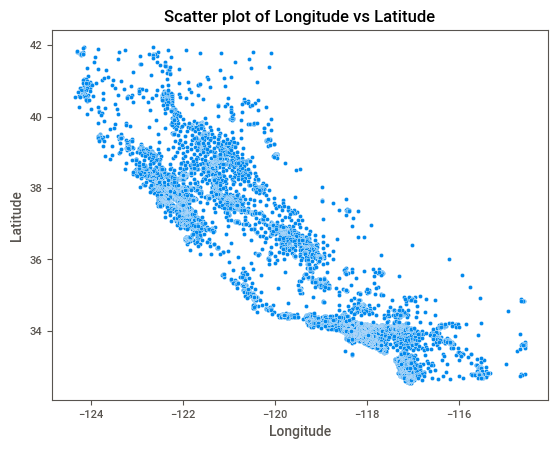

In [420]:
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Longitude vs Latitude')
plt.show()

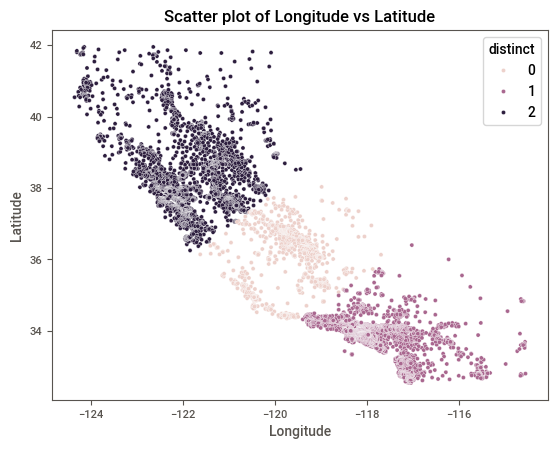

In [422]:
kmeans = KMeans(n_clusters=3)
df['distinct'] = kmeans.fit_predict(df[['Longitude', 'Latitude']])
sns.scatterplot(x='Longitude', y='Latitude', hue='distinct', data=df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Longitude vs Latitude')
plt.show()

In [423]:
df.drop(columns=['distinct'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], test_size=0.2)
y_train.shape

(16008,)

# Linear Model

## Analytically

In [424]:
X_income_train = np.array(X_train['MedInc'])
X_income_test = np.array(X_test['MedInc'])
y_train = np.array(y_train)
y_test = np.array(y_test)
X_b_train = np.c_[np.ones((len(X_income_train), 1)), X_income_train] 
W = np.linalg.inv(X_b_train.T @ X_b_train) @ X_b_train.T @ y_train
W

array([0.4463859, 0.4203586])

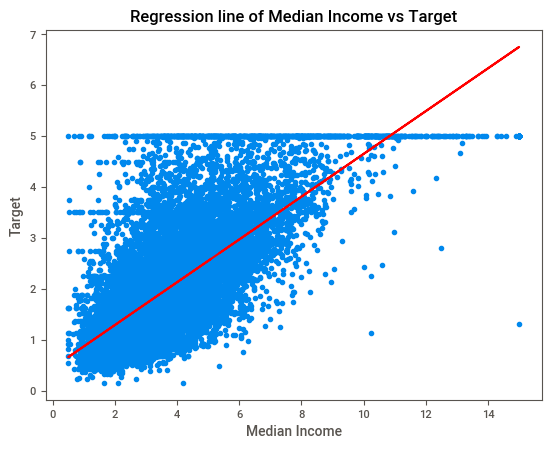

In [425]:
reggresion_line = X_b_train.dot(W)
plt.plot(X_income_train, reggresion_line, 'r-')
plt.scatter(X_income_train, y_train)
plt.xlabel('Median Income')
plt.ylabel('Target')
plt.title('Regression line of Median Income vs Target')
plt.show()

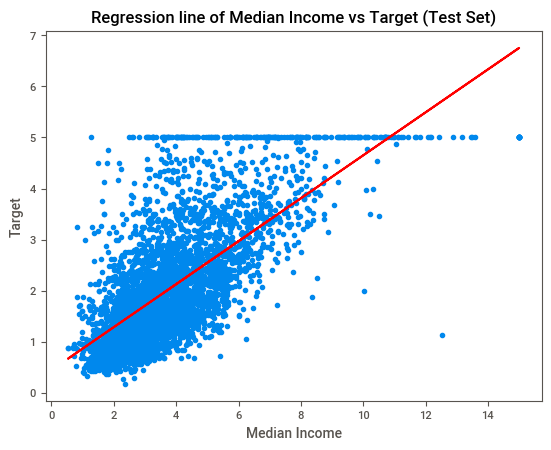

In [426]:
X_b_test = np.c_[np.ones((len(X_income_test), 1)), X_income_test]
regression_line_test = X_b_test.dot(W)
plt.plot(X_income_test, regression_line_test, 'r-')
plt.scatter(X_income_test, y_test)
plt.xlabel('Median Income')
plt.ylabel('Target')
plt.title('Regression line of Median Income vs Target (Test Set)')
plt.show()

## Iterative (sequential) Linear Reggresion

In [427]:
def mini_batch_gd_step(W, X_batch, y_batch, learning_rate=0.01):
    n = len(X_batch)
    gradients = (2 / n) * X_batch.T @ (X_batch @ W - y_batch) 
    W -= learning_rate * gradients
    return W

def mini_batch_gd(X, y, batch_size=32, n_epochs=100):
    losses = []
    W = np.random.randn(X.shape[1])
    for epoch in range(n_epochs):
        shuffled_indices = np.random.permutation(len(X))
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, len(X), batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            W = mini_batch_gd_step(W, X_batch, y_batch)
        losses.append(calculate_loss(X, y, W))
        print(f'Epoch: {epoch}, Loss: {losses[-1]}')
    return W, losses

def calculate_loss(X, y, W):
    return np.mean((X @ W - y) ** 2)

def plot_loss(losses):
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs Epoch')
    plt.show()

In [428]:
W, losses = mini_batch_gd(X_b_train, y_train)

Epoch: 0, Loss: 0.7140117367782615
Epoch: 1, Loss: 0.6980705870480473
Epoch: 2, Loss: 0.6980279841409605
Epoch: 3, Loss: 0.7310425535670321
Epoch: 4, Loss: 0.7713670999714486
Epoch: 5, Loss: 0.7059432963163165
Epoch: 6, Loss: 0.7332565574544982
Epoch: 7, Loss: 0.9057806032942063
Epoch: 8, Loss: 0.7369846570345387
Epoch: 9, Loss: 0.6999462508394437
Epoch: 10, Loss: 0.6985608823776658
Epoch: 11, Loss: 0.7065643793183618
Epoch: 12, Loss: 0.6996245067999247
Epoch: 13, Loss: 0.7078052763578963
Epoch: 14, Loss: 0.7176821848656306
Epoch: 15, Loss: 0.7118725666800215
Epoch: 16, Loss: 0.6983631055526498
Epoch: 17, Loss: 0.6982451355330525
Epoch: 18, Loss: 0.6999213918477138
Epoch: 19, Loss: 0.7115819969087955
Epoch: 20, Loss: 0.7108638857045406
Epoch: 21, Loss: 0.7027396073493011
Epoch: 22, Loss: 0.708218058286008
Epoch: 23, Loss: 0.7127430555827023
Epoch: 24, Loss: 0.6984860973109962
Epoch: 25, Loss: 0.7026117837690683
Epoch: 26, Loss: 0.729029393951638
Epoch: 27, Loss: 0.7019457639704318
Epoc

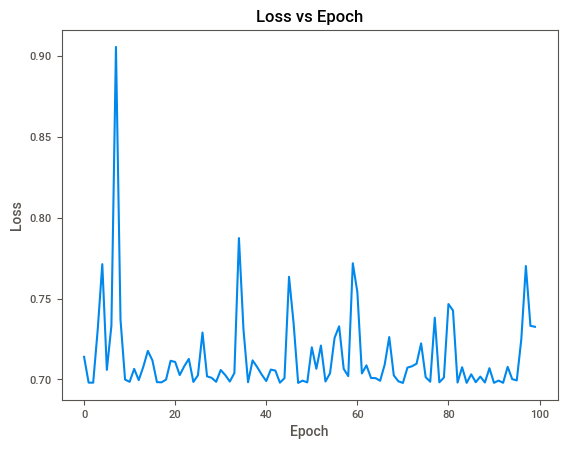

In [429]:
plot_loss(losses)

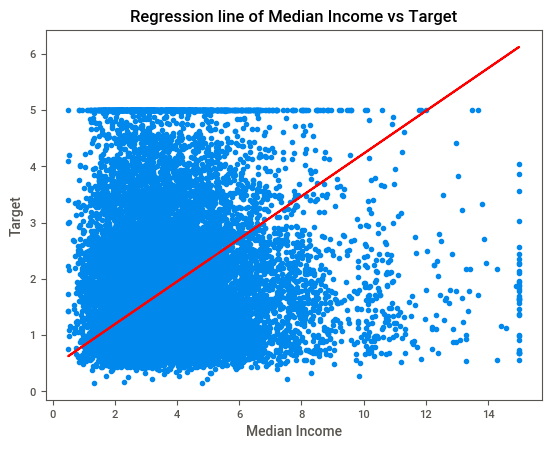

In [659]:
regression_line = X_b_train @ W
plt.plot(X_income_train, regression_line, 'r-')
plt.scatter(X_income_train, y_train)
plt.xlabel('Median Income')
plt.ylabel('Target')
plt.title('Regression line of Median Income vs Target')
plt.show()

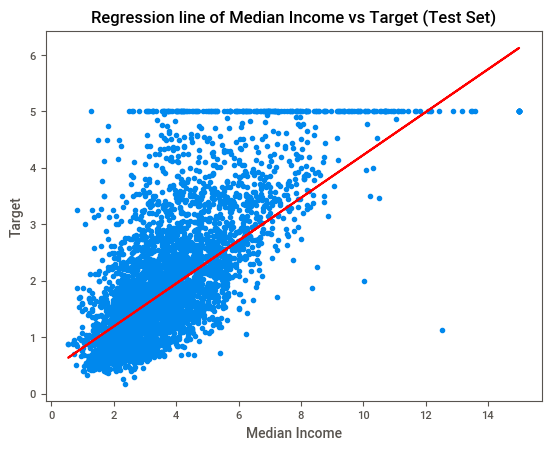

In [431]:
regression_line_test = X_b_test @ W
plt.plot(X_income_test, regression_line_test, 'r-')
plt.scatter(X_income_test, y_test)
plt.xlabel('Median Income')
plt.ylabel('Target')
plt.title('Regression line of Median Income vs Target (Test Set)')
plt.show()

## Sklearn model

In [432]:
model = LinearRegression()
model.fit(X_income_train.reshape(-1, 1), y_train)
model.coef_, model.intercept_

(array([0.4203586]), 0.4463859015896767)

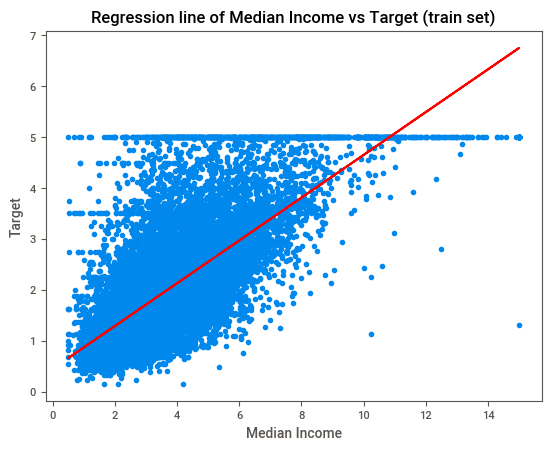

In [433]:
y_train_pred = model.predict(X_income_train.reshape(-1, 1))
plt.plot(X_income_train, y_train_pred, 'r-')
plt.scatter(X_income_train, y_train)
plt.xlabel('Median Income')
plt.ylabel('Target')
plt.title('Regression line of Median Income vs Target (train set)')
plt.show()

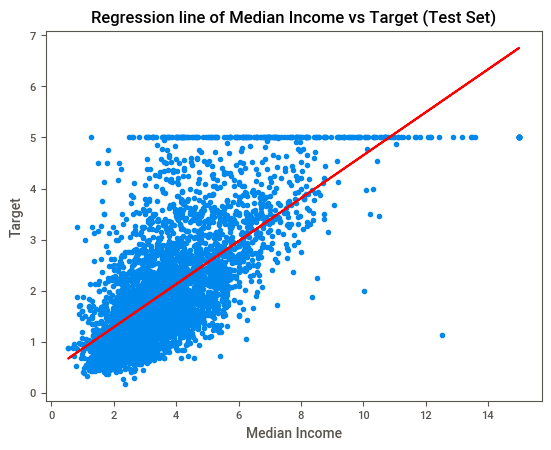

In [434]:
y_test_pred = model.predict(X_income_test.reshape(-1, 1))
plt.plot(X_income_test, y_test_pred, 'r-')
plt.scatter(X_income_test, y_test)
plt.xlabel('Median Income')
plt.ylabel('Target')
plt.title('Regression line of Median Income vs Target (Test Set)')
plt.show()

In [435]:
medInc = 3
y_3_pred = model.coef_ * medInc + model.intercept_
print(f'model prediction for medInc = 3: {y_3_pred[0]}')

model prediction for medInc = 3: 1.7074616979186226


## MedInc Doubled

In [436]:
X_train_medInc_doubled = np.c_[X_income_train, 2 * X_train['MedInc'].to_numpy()]
X_test_medInc_doubled = np.c_[X_income_test, 2 * X_test['MedInc'].to_numpy()]
model.fit(X_train_medInc_doubled, y_train)
model.coef_, model.intercept_

(array([-9.10436006e+11,  4.55218003e+11]), 0.44297440420157086)

In [439]:
y_train_pred = model.predict(X_train_medInc_doubled)
score = model.score(X_train_medInc_doubled, y_train)
print(f'Train score: {score}')

Train score: 0.475219597073266


In [440]:
y_test_pred = model.predict(X_test_medInc_doubled)
score = model.score(X_test_medInc_doubled, y_test)
print(f'Test Mean Squared Error: {score}')

Test Mean Squared Error: 0.48243703138905314


## All Features

In [441]:
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([ 4.33002586e-01,  1.18922583e-02, -1.07393702e-01,  9.37923249e-01,
         6.29163519e-05, -3.76445303e-01, -4.31267655e-01, -4.23101859e-01]),
 -34.60323481141817)

In [442]:
y_train_pred = model.predict(X_train)
score = model.score(X_train, y_train)
print(f'Train Mean Squared Error: {score}')

Train Mean Squared Error: 0.6677516779083656


In [443]:
y_test_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(f'Test Mean Squared Error: {score}')

Test Mean Squared Error: 0.6721773386413612


## All Features Except Population

In [444]:
X_train_without_population = X_train.drop(columns=['Population'])
X_test_without_population = X_test.drop(columns=['Population'])

In [445]:
model.fit(X_train_without_population, y_train)
model.coef_, model.intercept_

(array([ 0.43425391,  0.01046653, -0.11431418,  0.94147896, -0.36176719,
        -0.43726869, -0.42847342]),
 -34.920560228398884)

In [446]:
y_train_pred = model.predict(X_train_without_population)
score = model.score(X_train_without_population, y_train)
print(f'Train Mean Squared Error: {score}')

Train Mean Squared Error: 0.6660638890069279


In [447]:
y_test_pred = model.predict(X_test_without_population)
score = model.score(X_test_without_population, y_test)
print(f'Test Mean Squared Error: {score}')

Test Mean Squared Error: 0.6707569223123164


## Parabolic LS

In [448]:
poly_transformer = PolynomialFeatures(degree=2)
X_income_train_poly = poly_transformer.fit_transform(X_income_train.reshape(-1, 1))
X_income_test_poly = poly_transformer.fit_transform(X_income_test.reshape(-1, 1))
X_income_train_poly

array([[ 1.        ,  5.0761    , 25.76679121],
       [ 1.        ,  2.4728    ,  6.11473984],
       [ 1.        ,  3.4773    , 12.09161529],
       ...,
       [ 1.        ,  7.2074    , 51.94661476],
       [ 1.        ,  3.7375    , 13.96890625],
       [ 1.        ,  5.3794    , 28.93794436]])

In [449]:
model.fit(X_income_train_poly, y_train)
model.coef_, model.intercept_

(array([ 0.        ,  0.52927924, -0.01006934]), 0.2117810908541662)

In [450]:
y_train_pred = model.predict(X_income_train_poly)
score = model.score(X_income_train_poly, y_train)
print(f'Train Mean Squared Error: {score}')

Train Mean Squared Error: 0.47930030222955367


In [451]:
y_test_pred = model.predict(X_income_test_poly)
score = model.score(X_income_test_poly, y_test)
print(f'Test Mean Squared Error: {score}')

Test Mean Squared Error: 0.4887181527008835


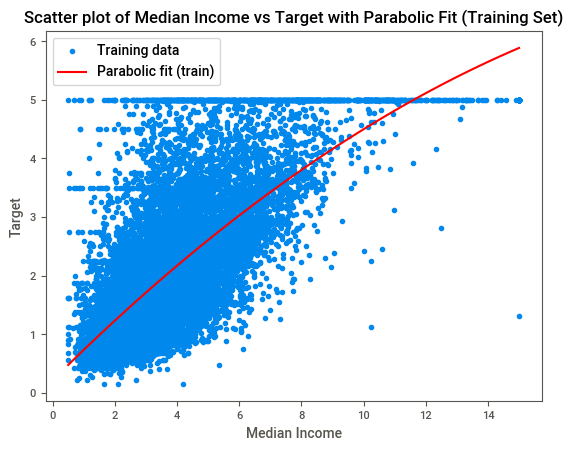

In [452]:
plt.scatter(X_income_train, y_train, label='Training data')
x_vals = np.linspace(X_income_train.min(), X_income_train.max(), 100)
y_vals = model.intercept_ + model.coef_[1] * x_vals + model.coef_[2] * x_vals ** 2
plt.plot(x_vals, y_vals, 'r-', label='Parabolic fit (train)')
plt.xlabel('Median Income')
plt.ylabel('Target')
plt.title('Scatter plot of Median Income vs Target with Parabolic Fit (Training Set)')
plt.legend()
plt.show()

## Polynomial Regression

In [453]:
poly_transformer = PolynomialFeatures(degree=9)
ridge = Ridge(alpha=0.1)
lasso = Lasso(alpha=0.1)
X_income_train_poly = poly_transformer.fit_transform(X_income_train.reshape(-1, 1))
X_income_test_poly = poly_transformer.fit_transform(X_income_test.reshape(-1, 1))
X_income_train_poly.shape
y_train.shape

(16008,)

In [454]:
def fit_models(models, X, y):
    for model in models:
        model.fit(X, y)
        score = model.score(X, y)
        print(f'{model.__class__.__name__} Train Score: {score}')
    return tuple(models)

In [455]:
model, ridge, lasso = fit_models([model, ridge, lasso], X_income_train_poly, y_train)

LinearRegression Train Score: 0.4912832748921987
Ridge Train Score: 0.4912228022212113
Lasso Train Score: 0.4858134598720313


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.51045e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.577e+03, tolerance: 2.129e+00
  model = cd_fast.enet_coordinate_descent(


In [456]:
y_train_pred_linear = model.predict(X_income_train_poly)
y_train_pred_ridge = ridge.predict(X_income_train_poly)
y_train_pred_lasso = lasso.predict(X_income_train_poly)

In [457]:
y_test_pred_linear = model.predict(X_income_test_poly)
y_test_pred_ridge = ridge.predict(X_income_test_poly)
y_test_pred_lasso = lasso.predict(X_income_test_poly)
print(f'Test Mean Squared Error: {model.score(X_income_test_poly, y_test)}')
print(f'Test Mean Squared Error (Ridge): {ridge.score(X_income_test_poly, y_test)}')
print(f'Test Mean Squared Error (Lasso): {lasso.score(X_income_test_poly, y_test)}')

Test Mean Squared Error: 0.496721773775919
Test Mean Squared Error (Ridge): 0.4968459907305427
Test Mean Squared Error (Lasso): 0.49212913158287885


In [458]:
def plot_models(models, X, y, poly_transformer):
    plt.scatter(X, y, label='Training data')
    x_vals = np.linspace(X.min(), X.max(), 100)
    x_vals_poly = poly_transformer.fit_transform(x_vals.reshape(-1, 1))
    for model in models:
        y_vals = model.predict(x_vals_poly)
        plt.plot(x_vals, y_vals, label=model.__class__.__name__)
    plt.xlabel('Median Income')
    plt.ylabel('Target')
    plt.title('Scatter plot of Median Income vs Target with Polynomial Fit (Training Set)')
    plt.legend()
    plt.show() 

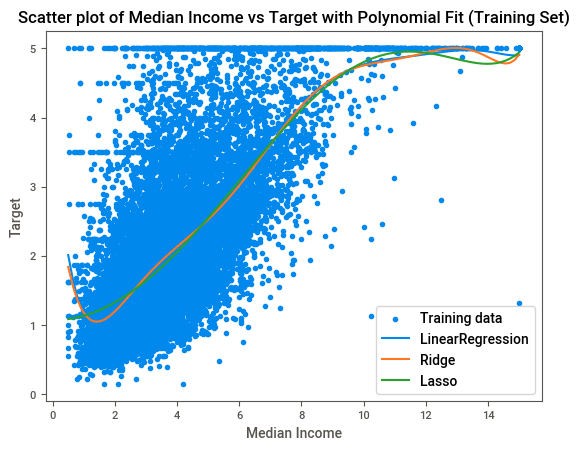

In [459]:
plot_models([model, ridge, lasso], X_income_train, y_train, poly_transformer)

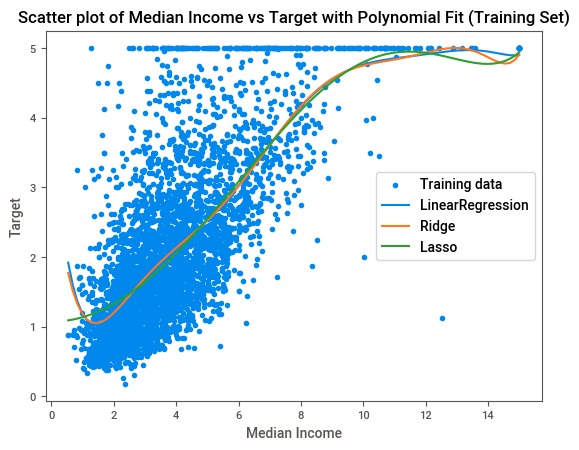

In [460]:
plot_models([model, ridge, lasso], X_income_test, y_test, poly_transformer)

## More feature extractions

In [660]:
new_df = df.copy() 
new_df.drop(columns=['Longitude', 'Latitude', 'Population', 'aveBedrms', 'HouseAge'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns=['target']), new_df['target'], test_size=0.2)
poly_transformer = PolynomialFeatures(degree=4)
X_train_poly = poly_transformer.fit_transform(X_train)
X_test_poly = poly_transformer.fit_transform(X_test)

model, ridge = fit_models([model, ridge], X_train_poly, y_train)

KeyError: "['aveBedrms'] not found in axis"

In [661]:
print(f'Test linear score: {model.score(X_test_poly, y_test)}')
print(f'Test Ridge score: {ridge.score(X_test_poly, y_test)}')
new_df.info()

Test linear score: 0.7085661025717471
Test Ridge score: 0.6817921142458976
<class 'pandas.core.frame.DataFrame'>
Index: 20010 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20010 non-null  float64
 1   HouseAge    20010 non-null  float64
 2   AveRooms    20010 non-null  float64
 3   AveBedrms   20010 non-null  float64
 4   Population  20010 non-null  float64
 5   AveOccup    20010 non-null  float64
 6   Latitude    20010 non-null  float64
 7   Longitude   20010 non-null  float64
 8   target      20010 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [662]:
new_df['MedInc_AveRooms'] = new_df['MedInc'] * new_df['AveRooms']
train_linear_scores = []
train_ridge_scores = []
test_linear_scores = []
test_ridge_scores = []
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns=['target']), new_df['target'], test_size=0.2)
    poly_transformer = PolynomialFeatures(degree=3)
    X_train_poly = poly_transformer.fit_transform(X_train)
    X_test_poly = poly_transformer.fit_transform(X_test)
    model, ridge = fit_models([model, ridge], X_train_poly, y_train)
    train_linear_scores.append(model.score(X_train_poly, y_train))
    test_linear_scores.append(model.score(X_test_poly, y_test))
    train_ridge_scores.append(ridge.score(X_train_poly, y_train))
    test_ridge_scores.append(ridge.score(X_test_poly, y_test))
print(f'average linear train score: {np.mean(train_linear_scores)}')
print(f'average ridge score: {np.mean(train_ridge_scores)}')
print(f'average linear test score: {np.mean(test_linear_scores)}')
print(f'average ridge test score: {np.mean(test_ridge_scores)}')

LinearRegression Train Score: 0.7655249525967116
Ridge Train Score: 0.7636388341321542
LinearRegression Train Score: 0.7659343283250539
Ridge Train Score: 0.7632939924243765


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.58424e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.55369e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


LinearRegression Train Score: 0.7688242471942914
Ridge Train Score: 0.7662552384957902
LinearRegression Train Score: 0.7650510461727115
Ridge Train Score: 0.7631407714196843


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.57181e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.54429e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


LinearRegression Train Score: 0.7695798454440758
Ridge Train Score: 0.7672554983221863
average linear train score: 0.7669828839465689
average ridge score: 0.7647168669588382
average linear test score: 0.7535414931763277
average ridge test score: 0.7516248568373458


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.59986e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [634]:
sv_report = sv.analyze(new_df, target_feat='target')
sv_report.show_html('california_housing_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report california_housing_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
